#DecisionTreeRegressorの可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.1
# !pip install scikit-learn==1.2.2

In [ ]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__)

1.22.4
3.7.1
0.20.1
1.2.2


In [ ]:
# 特徴量と目的変数の設定
X_train = np.array([[10], [20], [30], [40], [50], [60], [70], [80]])
y_train = np.array([6, 5, 7, 1, 2, 1, 6, 4])

In [ ]:
# 回帰木の学習と予測
model = DecisionTreeRegressor(criterion='squared_error', max_depth=2, min_samples_leaf=1, ccp_alpha=0, random_state=0)
model.fit(X_train, y_train)
model.predict(X_train)

array([5.5       , 5.5       , 7.        , 1.33333333, 1.33333333,
       1.33333333, 5.        , 5.        ])

In [ ]:
# ハイパーパラメータの表示
model.get_params()

{'ccp_alpha': 0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

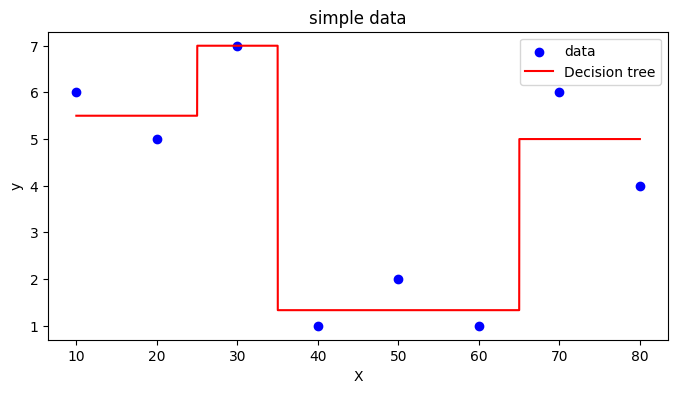

In [ ]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定

# 学習データの最小値から最大値まで0.01刻みのX_pltを作成し、予測
X_plt = np.arange(X_train.min(), X_train.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt)

# 学習データの散布図と予測値のプロット
plt.scatter(X_train, y_train, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='Decision tree')
plt.ylabel('y')
plt.xlabel('X')
plt.title('simple data')
plt.legend(loc='upper right')
plt.show()

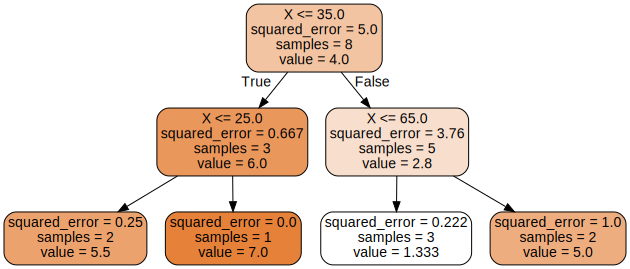

In [ ]:
# 木の可視化
dot_data = tree.export_graphviz(model, out_file=None, rounded=True, feature_names=['X'], filled=True)
graphviz.Source(dot_data, format='png')

# 予測値の検証

In [ ]:
# 分割点の計算
def loss(X_train, y_train):
  index =[]
  loss =[]
  # 表示のため、2次元配列のX_trainを1次元配列に変換
  X_train = X_train.flatten()
  # 分割点ごとの予測値とSSE,MSEを計算  
  for i in range(1, len(X_train)):
      X_left = np.array(X_train[:i])
      X_right = np.array(X_train[i:])
      y_left = np.array(y_train[:i])
      y_right = np.array(y_train[i:])
      # 分割点のインデックス
      print('*****')
      print('index', i)
      index.append(i)
      # 左右の分割
      print('X_left:', X_left)
      print('X_right:', X_right)
      print('y_left:', y_left)
      print('y_right:', y_right)
      # 予測値の計算
      print('y_pred_left:', np.mean(y_left))
      print('y_pred_right:', np.mean(y_right))
      # SSEの計算
      y_error_left = y_left - np.mean(y_left)
      y_error_right = y_right - np.mean(y_right)
      SSE = np.sum(y_error_left * y_error_left) + np.sum(y_error_right * y_error_right)
      print('SSE:', SSE)
      loss.append(SSE)
      # MSEの計算
      MSE_left = 1/len(y_left) * np.sum(y_error_left * y_error_left)
      MSE_right = 1/len(y_right) * np.sum(y_error_right * y_error_right)
      print('MSE_left:', MSE_left)
      print('MSE_right:', MSE_right)
      print('')

  # プロットのため、1次元配列のX_trainを2次元配列に変換
  index = np.array(index)
  X_plt = index[:, np.newaxis]
  # 分割点ごとのSSEを可視化
  plt.figure(figsize=(10, 4)) #プロットのサイズ指定
  plt.plot(X_plt, loss)
  plt.xlabel('index')
  plt.ylabel('SSE')
  plt.title('SSE vs Split Point index')
  plt.grid()
  plt.show()

*****
index 1
X_left: [10]
X_right: [20 30 40 50 60 70 80]
y_left: [6]
y_right: [5 7 1 2 1 6 4]
y_pred_left: 6.0
y_pred_right: 3.7142857142857144
SSE: 35.42857142857143
MSE_left: 0.0
MSE_right: 5.061224489795919

*****
index 2
X_left: [10 20]
X_right: [30 40 50 60 70 80]
y_left: [6 5]
y_right: [7 1 2 1 6 4]
y_pred_left: 5.5
y_pred_right: 3.5
SSE: 34.0
MSE_left: 0.25
MSE_right: 5.583333333333333

*****
index 3
X_left: [10 20 30]
X_right: [40 50 60 70 80]
y_left: [6 5 7]
y_right: [1 2 1 6 4]
y_pred_left: 6.0
y_pred_right: 2.8
SSE: 20.8
MSE_left: 0.6666666666666666
MSE_right: 3.7600000000000002

*****
index 4
X_left: [10 20 30 40]
X_right: [50 60 70 80]
y_left: [6 5 7 1]
y_right: [2 1 6 4]
y_pred_left: 4.75
y_pred_right: 3.25
SSE: 35.5
MSE_left: 5.1875
MSE_right: 3.6875

*****
index 5
X_left: [10 20 30 40 50]
X_right: [60 70 80]
y_left: [6 5 7 1 2]
y_right: [1 6 4]
y_pred_left: 4.2
y_pred_right: 3.6666666666666665
SSE: 39.46666666666667
MSE_left: 5.36
MSE_right: 4.222222222222222

*****
i

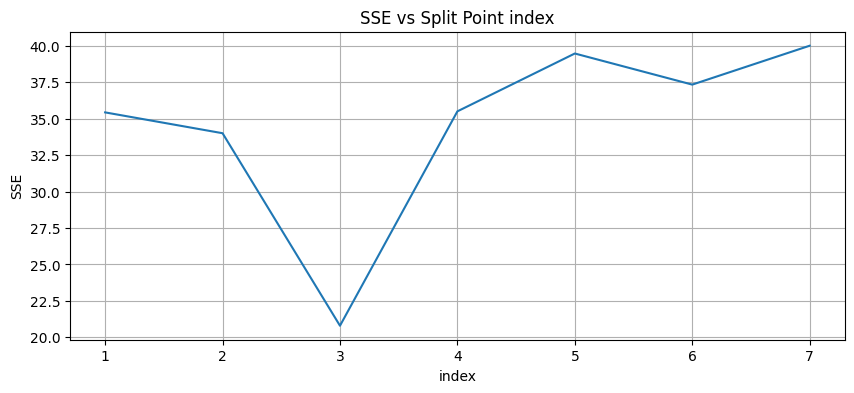

In [ ]:
# 全レコードの深さ1の分割点
X_train = np.array([[10], [20], [30], [40], [50], [60], [70], [80]])
y_train = np.array([6, 5, 7, 1, 2, 1, 6, 4])
loss(X_train, y_train)

*****
index 1
X_left: [10]
X_right: [20 30]
y_left: [6]
y_right: [5 7]
y_pred_left: 6.0
y_pred_right: 6.0
SSE: 2.0
MSE_left: 0.0
MSE_right: 1.0

*****
index 2
X_left: [10 20]
X_right: [30]
y_left: [6 5]
y_right: [7]
y_pred_left: 5.5
y_pred_right: 7.0
SSE: 0.5
MSE_left: 0.25
MSE_right: 0.0



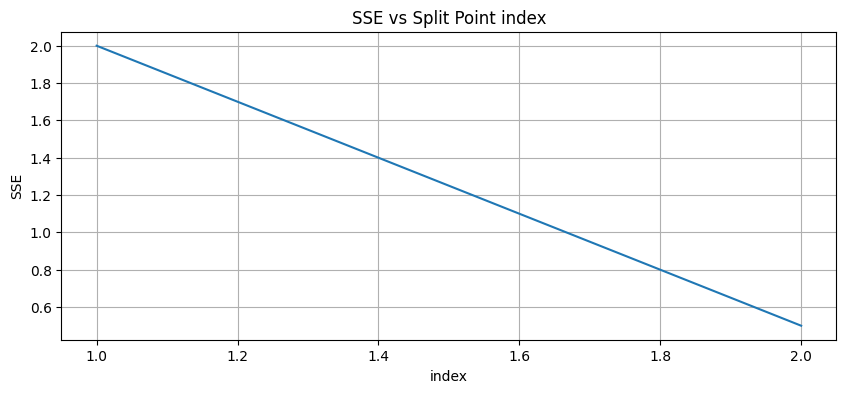

In [ ]:
# 左葉レコードの深さ2の分割点
X_train_L = np.array([[10], [20], [30]])
y_train_L = np.array([6, 5, 7])
loss(X_train_L, y_train_L)

*****
index 1
X_left: [40]
X_right: [50 60 70 80]
y_left: [1]
y_right: [2 1 6 4]
y_pred_left: 1.0
y_pred_right: 3.25
SSE: 14.75
MSE_left: 0.0
MSE_right: 3.6875

*****
index 2
X_left: [40 50]
X_right: [60 70 80]
y_left: [1 2]
y_right: [1 6 4]
y_pred_left: 1.5
y_pred_right: 3.6666666666666665
SSE: 13.166666666666668
MSE_left: 0.25
MSE_right: 4.222222222222222

*****
index 3
X_left: [40 50 60]
X_right: [70 80]
y_left: [1 2 1]
y_right: [6 4]
y_pred_left: 1.3333333333333333
y_pred_right: 5.0
SSE: 2.6666666666666665
MSE_left: 0.2222222222222222
MSE_right: 1.0

*****
index 4
X_left: [40 50 60 70]
X_right: [80]
y_left: [1 2 1 6]
y_right: [4]
y_pred_left: 2.5
y_pred_right: 4.0
SSE: 17.0
MSE_left: 4.25
MSE_right: 0.0



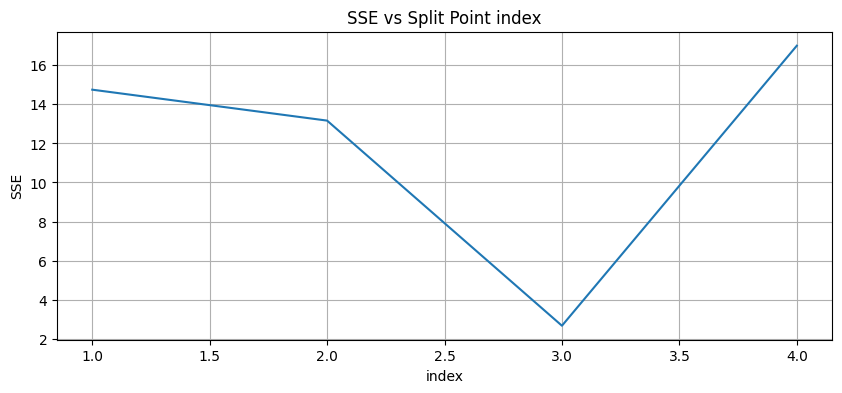

In [ ]:
# 右葉レコードの深さ2の分割点
X_train_R = np.array([[40], [50], [60], [70], [80]])
y_train_R = np.array([1, 2, 1, 6, 4])
loss(X_train_R, y_train_R)